In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import random
IMG_SIZE=32

In [3]:
training_data=[]
def train_data():
    
    
      # labeling diseases
      label_covid=[1.0,0.0,0.0,0.0]  #cyst
      label_pneu=[0.0,1.0,0.0,0.0] #normal
      label_tube=[0.0,0.0,1.0,0.0] #stone
      label_normal=[0.0,0.0,0.0,1.0] #tumor

      #path of images
      drive_path=[r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst",
                 r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Normal",
                 r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Stone",
                 r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Tumor"]
        


      #Collecting training data
      #cyst
      for img in tqdm(os.listdir(drive_path[0])): 
        path=os.path.join(drive_path[0],img) #joining path of image 
        img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
        training_data.append([np.array(img),np.array(label_covid)]) #trainig data (image,label)

      #nomral
      for img in tqdm(os.listdir(drive_path[1])):
        path=os.path.join(drive_path[1],img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label_pneu)])

      for img in tqdm(os.listdir(drive_path[2])):#stone
        path=os.path.join(drive_path[2],img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label_tube)])    
       #tumor
      for img in tqdm(os.listdir(drive_path[3])):
        path=os.path.join(drive_path[3],img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label_normal)])   

train_data()


100%|██████████████████████████████████████████████████████████████████████████████| 2283/2283 [00:51<00:00, 44.39it/s]


In [5]:
len(training_data)

12446

In [6]:
from random import shuffle
shuffle(training_data)

In [7]:
Train_data=training_data[:9000]
Test_data=training_data[9000:]

In [8]:
#training data
X_train=np.array([i[0] for i in Train_data])
Y_train=np.array([i[1] for i in Train_data])

#testing data
X_test=np.array([i[0] for i in Test_data])
Y_test=np.array([i[1] for i in Test_data])

In [9]:
print("Shape of X_train:",X_train.shape,"\nShape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape,"\nShape of Y_test:",Y_test.shape)

Shape of X_train: (9000, 32, 32, 3) 
Shape of Y_train: (9000, 4)
Shape of X_test: (3446, 32, 32, 3) 
Shape of Y_test: (3446, 4)


In [10]:
def cnn_model():
  model=tf.keras.Sequential([tf.keras.layers.InputLayer((IMG_SIZE,IMG_SIZE,3)),
                             
                             tf.keras.layers.ZeroPadding2D(padding=(3,3)),

                             tf.keras.layers.Conv2D(filters=32,kernel_size=7,strides=(1,1)),

                             tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones'),

                             tf.keras.layers.ReLU(),

                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(4,activation='softmax'),                             
                             
                             ])
  return model

conv_model=cnn_model() #calling the model
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) #compliing the model

history=conv_model.fit(x=X_train,y=Y_train,epochs=10,validation_data=(X_test,Y_test),batch_size=32) 

Epoch 1/10
282/282 [==============================] - 33s 65ms/step - loss: 0.4176 - accuracy: 0.8653 - val_loss: 0.0515 - val_accuracy: 0.9922
Epoch 2/10
282/282 [==============================] - 17s 58ms/step - loss: 0.0364 - accuracy: 0.9932 - val_loss: 0.0170 - val_accuracy: 0.9980
Epoch 3/10
282/282 [==============================] - 16s 56ms/step - loss: 0.0131 - accuracy: 0.9982 - val_loss: 0.0155 - val_accuracy: 0.9965
Epoch 4/10
282/282 [==============================] - 17s 62ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9994
Epoch 5/10
282/282 [==============================] - 17s 60ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
282/282 [==============================] - 16s 58ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/10
282/282 [==============================] - 17s 61ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy:

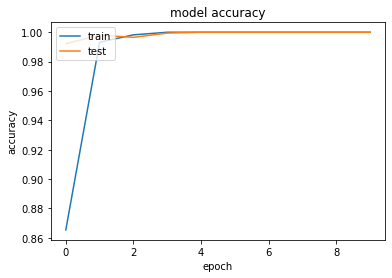

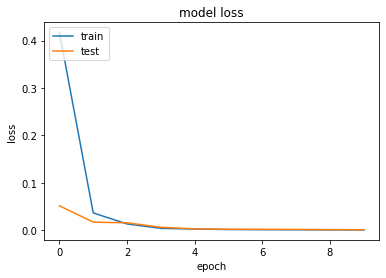

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
conv_model.save('convolution_model_KT.h5') #Saving the CNN model
conv_model.evaluate(X_test,Y_test) #Evaluating the CNN model

108/108 [==============================] - 2s 15ms/step - loss: 8.8042e-04 - accuracy: 1.0000


[0.0008804173558019102, 1.0]

In [23]:
def process(path):
  img=cv2.imread(path,cv2.IMREAD_COLOR)
#   print(img)
  img=cv2.resize(img,(32,32))
  x=img
  img=np.expand_dims(img,axis=0)
  return img,x
# def pred_list(pred):
#   pred_list=[]
#   for i in pred[0]:
#     x=format(i,'.8f')
#     pred_list.append(x)
#   return pred_list

def disease(pred_list):
  x=np.argmax(pred_list)
  if x==0:
    print("Disease: Cyst")
  elif x==1:
    print("Normal")
  elif x==2:
    print("Disease: Stone")
  elif x==3:
    print("Disease Tumor")

1/1 [==============================] - 0s 12ms/step
[[9.9999940e-01 2.3804501e-08 3.0533307e-08 5.7716665e-07]]
Disease: Cyst


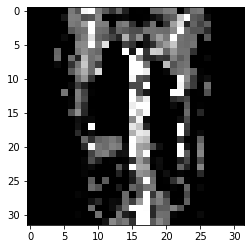

In [30]:
# path='D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst\Cyst- (1).jpg'
path=r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst\Cyst- (1).jpg"
img,x=process(path)
pred=conv_model.predict(img)
print(pred)
# pred=pred_list(pred)
# print(pred)
disease(pred)
plt.imshow(x)


1/1 [==============================] - 0s 23ms/step
[[4.3087643e-05 9.9994886e-01 4.5167540e-06 3.5731996e-06]]
Normal


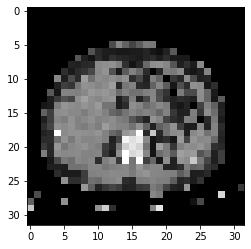

In [31]:
# path='D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst\Cyst- (1).jpg'
path=r"D:\new\projects\CT_KIDNEY_DATASET\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Normal\Normal- (1).jpg"
img,x=process(path)
pred=conv_model.predict(img)
print(pred)
# pred=pred_list(pred)
# print(pred)
disease(pred)
plt.imshow(x)
